IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# Mini-projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

Yara Khamis

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et <u>**un seul rendu sur un des deux comptes Moodle doit être fait**</u>.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**La dernière séance de TD-TME11 de votre groupe sera réservée pour travailler sur ce mini-projet.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *projet-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2025


<font size="+1" color="RED"><b>Date de rendu : au plus tard le lundi 19 mai 2025, avant 11h</b></font>
    
<b>Attention! le site Moodle ferme à 11h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...
<b>Il n'y aura pas de prolongation possible.</b>

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.



## Travail à faire

Appliquer les algorithmes d'apprentissage vus en cours sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Compte-rendu demandé
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce **notebook** complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre **librairie iads** sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un **poster** sous la forme d'un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les <u>fichiers de données ne doivent pas être inclus dans votre archive</u> ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- **Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 20 mai 2025**</font>, à partir de 9h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille (la remise d'un compte-rendu avant lundi 19 mai 11h est obligatoire pour être autorisé à passer une soutenance).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- MiniProjet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données doit considérer cette arborescence.



In [2]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

from sklearn.feature_extraction.text import CountVectorizer

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de utils_nettoyage
from iads import utils_nettoyage as net

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : 20newsgroups

Les données sont fournies dans le fichier CSV `20newsgroups.csv` contenu dans l'archive. Une documentation sur ces données peut être consultée sur la <a href="http://qwone.com/~jason/20Newsgroups/" target="NEW">page ScikitLearn</a>.
Ces données sont des dépêches issues de 20 groupes de discussions.


### Chargement des données

In [3]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")
newsgroups_df

,messages,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


In [4]:
np.unique(newsgroups_df['target'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

### Prétraitement

Dans un premier temps, vous devez appliquer les étapes de prétraitements vues dans le TME 6. Pour le nettoyage, la liste des mots inutiles (stopwords) est fournie dans le fichier `stopwords.csv` de l'archive

In [5]:
stop_words_df = pd.read_csv("data/stopwords.csv")
stop_words_df

,stopword
0,a
1,about
2,above
3,after
4,again
...,...
193,you're
194,yours
195,yourself
196,yourselves


In [6]:
#On transforme la colonne "stopword" du dataset en liste et on stocke le resultat dans stopwords_list
stopwords_list = stop_words_df['stopword'].tolist()

# --- Avec stopwords : version complète ---
lesmots_avec_stopwords = []
for message in newsgroups_df['messages']:
    mots = net.text2vect(str(message), [])  # garder tous les mots
    lesmots_avec_stopwords.append(mots)
news_avec_stopwords = newsgroups_df.copy()
news_avec_stopwords['les_mots'] = lesmots_avec_stopwords

# --- Sans stopwords : nettoyage standard ---
lesmots_sans_stopwords = []
for message in newsgroups_df['messages']:
    mots = net.text2vect(str(message), stopwords_list)  # enlever les stopwords
    lesmots_sans_stopwords.append(mots)
news_sans_stopwords = newsgroups_df.copy()
news_sans_stopwords['les_mots'] = lesmots_sans_stopwords


In [7]:
news_avec_stopwords

,messages,target,les_mots
0,\n\nI am sure some bashers of Pens fans are pr...,10,"[i, am, sure, some, bashers, of, pens, fans, a..."
1,My brother is in the market for a high-perform...,3,"[my, brother, is, in, the, market, for, a, hig..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,"[finally, you, said, what, you, dream, about, ..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,"[think, it's, the, scsi, card, doing, the, dma..."
4,1) I have an old Jasmine drive which I cann...,4,"[1, i, have, an, old, jasmine, drive, which, i..."
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,"[dn, from, nyeda, cnsvax, uwec, edu, david, ny..."
18842,\nNot in isolated ground recepticles (usually ...,12,"[not, in, isolated, ground, recepticles, usual..."
18843,I just installed a DX2-66 CPU in a clone mothe...,3,"[i, just, installed, a, dx2, 66, cpu, in, a, c..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,"[wouldn't, this, require, a, hyper, sphere, in..."


In [8]:
news_sans_stopwords

,messages,target,les_mots
0,\n\nI am sure some bashers of Pens fans are pr...,10,"[sure, bashers, pens, fans, pretty, confused, ..."
1,My brother is in the market for a high-perform...,3,"[brother, market, high, performance, video, ca..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,"[finally, said, dream, mediterranean, new, are..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,"[think, scsi, card, dma, transfers, disks, scs..."
4,1) I have an old Jasmine drive which I cann...,4,"[1, old, jasmine, drive, cannot, use, new, sys..."
...,...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,"[dn, nyeda, cnsvax, uwec, edu, david, nye, dn,..."
18842,\nNot in isolated ground recepticles (usually ...,12,"[isolated, ground, recepticles, usually, unusu..."
18843,I just installed a DX2-66 CPU in a clone mothe...,3,"[installed, dx2, 66, cpu, clone, motherboard, ..."
18844,\nWouldn't this require a hyper-sphere. In 3-...,1,"[require, hyper, sphere, 3, space, 4, points, ..."


In [9]:
df_avec_stopwords, _  =  net.train_test_split(news_avec_stopwords,'target', taux=0.05, random_seed=42)
test_avec_stopwords, _ = net.train_test_split(news_avec_stopwords,'target', taux=0.08, random_seed=42)
df_avec_stopwords

,messages,target,les_mots
0,"\n\n\n\nOh, do please try not to be ludicrous....",18,"[oh, do, please, try, not, to, be, ludicrous, ..."
1,\nXGA or XGA-2? For the original XGA you just...,3,"[xga, or, xga, 2, for, the, original, xga, you..."
2,"\n\nHST is about 25,500 lbs (11,600 kg). That...",14,"[hst, is, about, 25, 500, lbs, 11, 600, kg, th..."
3,"I don't know about where you are, but here in ...",7,"[i, don't, know, about, where, you, are, but, ..."
4,I have a few the original IBM 10Mb harddisks f...,6,"[i, have, a, few, the, original, ibm, 10mb, ha..."
...,...,...,...
927,\nWhy? There is no need to go into this..........,17,"[why, there, is, no, need, to, go, into, this,..."
928,Why should anyone (check: let's restrict this ...,19,"[why, should, anyone, check, let's, restrict, ..."
929,"JG> After this fall, I believe IBM no longer h...",2,"[jg, after, this, fall, i, believe, ibm, no, l..."
930,Does anybody share my opinion that in big-city...,8,"[does, anybody, share, my, opinion, that, in, ..."


In [10]:
print(test_avec_stopwords.shape)

(1498, 3)


In [11]:
df_sans_stopwords,_ =  net.train_test_split(news_sans_stopwords,'target', taux=0.01, random_seed=42)
test_sans_stopwords, _ = net.train_test_split(news_avec_stopwords,'target', taux=0.08, random_seed=42)
df_sans_stopwords

,messages,target,les_mots
0,"\nThe sensitivity is changed using the /S, /V,...",2,"[sensitivity, changed, using, v, h, parameter,..."
1,NaN,12,[nan]
2,"\n\nIn fact, they make some ,but they just don...",7,"[fact, make, sell, u, sunny, california, 1, 6l..."
3,"\n\nMSG is mono sodium glutamate, a fairly str...",13,"[msg, mono, sodium, glutamate, fairly, straigh..."
4,"I am a newbie to the net, and I am trying to g...",14,"[newbie, net, trying, get, information, paper,..."
...,...,...,...
168,"\n\n\n\n\n\nObviously, we have different sourc...",0,"[obviously, different, sources, bill, moyers, ..."
169,This seems to be a simple problem but I just c...,1,"[seems, simple, problem, cannot, solve, wrote,..."
170,"Hi world,\n \n I want to buy a S...",3,"[hi, world, want, buy, spirit, ii, 14400, data..."
171,\n\n\nWouldn't you rather have some type of st...,7,"[rather, type, standard, electrical, plug, ins..."


In [12]:
print(np.unique(df_sans_stopwords['target']))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


## Tâches à réaliser

### Apprentissage supervisé

*Tâches*: évaluation d'algorithmes et de représentations des données.
- classification binaire
- classification multi-classe

*Etudes suggérées*:
- représentations des données
    - avec ou sans suppression des stopwords
    - différentes représentations: bag-of-words binaire, avec comptage, avec fréquences, avec tfidf
- différents classifiers:
    - perceptron,
    - k-plus proches voisins avec distance euclidienne,
    - k-plus proches voisins avec distance cosinus (cf. TD),
    - Naives Bayes,
    - arbres de décision
- analyse des résultats:
    - accuracy, temps d'exécutions
    - score fold par fold
    - matrice de confusion


In [13]:
textes_train = [' '.join(mots) for mots in df_sans_stopwords['les_mots']]
textes_test = [' '.join(mots) for mots in test_sans_stopwords['les_mots']]
textes_full = [' '.join(mots) for mots in news_sans_stopwords['les_mots']]


In [14]:
# Préparation des labels
y_train = np.array(df_sans_stopwords['target'])
y_test = np.array(test_sans_stopwords['target'])
y_full = np.array(news_sans_stopwords['target'])

In [15]:
def binarize_labels(y, pos_class):
    return np.array([1 if label == pos_class else -1 for label in y])

In [16]:
classe_positive = 3
y_train_bin = binarize_labels(y_train, classe_positive)
y_test_bin = binarize_labels(y_test, classe_positive)
y_full_bin = binarize_labels(y_full, classe_positive)



In [17]:
vect = CountVectorizer(binary=True, max_features=50000)
vect.fit(textes_full)

X_train = vect.transform(textes_train).toarray()
X_test = vect.transform(textes_test).toarray()
X_full = vect.transform(textes_full).toarray()


In [18]:
input_dim = X_train.shape[1]
k = 5
knn = classif.ClassifierKNN(input_dim, k)

# Mesure du temps d'entraînement
start_train = time.time()
knn.train(X_train, y_train_bin)
elapsed_train = time.time() - start_train
print("Fin train")
print(f"Temps d'entraînement : {elapsed_train:.4f} secondes")

# Mesure du temps d'évaluation (accuracy)
start_test = time.time()
acc_test = knn.accuracy(X_test, y_test_bin)
elapsed_test = time.time() - start_test
print(f"Accuracy sur test (classe {classe_positive} vs reste) : {acc_test:.4f}")
print(f"Temps d'évaluation : {elapsed_test:.4f} secondes")


Fin train
Temps d'entraînement : 0.0000 secondes
Accuracy sur test (classe 3 vs reste) : 0.9479
Temps d'évaluation : 61.0636 secondes


In [26]:
performances, moyenne, ecart_type, matrice_confusion = ev.validation_croisee(knn, (X_test, y_test_bin), 5)
classes_uniques = np.unique(y_test_bin)
ev.afficher_matrice_confusion(matrice_confusion, classes_uniques)

AttributeError: module 'iads.evaluation' has no attribute 'afficher_matrice_confusion'

[autoreload of iads.Classifiers failed: Traceback (most recent call last):
  File "/home/yarina/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/yarina/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/yarina/an3/LU3IN026/Sciences-de-donnees/iads/Classifiers.py", line 366, in <module>
    class ClassifierArbreDecision(classif.Classifier):
NameError: name 'classif' is not defined
]


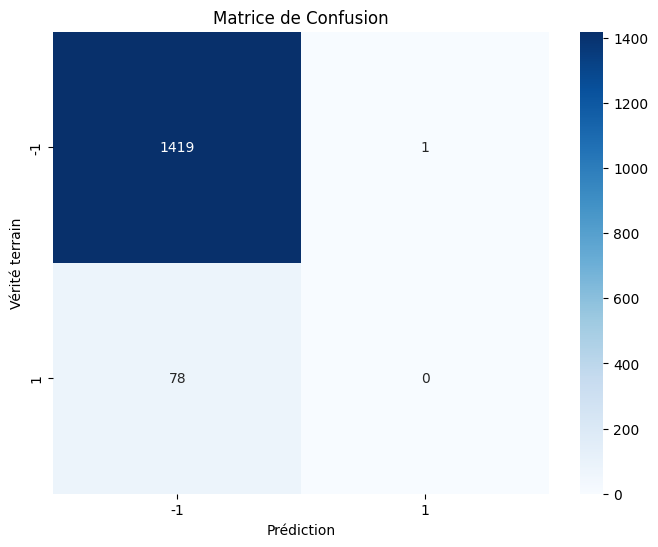

In [27]:
ev.afficher_matrice_confusion(matrice_confusion, classes_uniques)

In [19]:
input_dim = X_train.shape[1]
k = 5
knn_cos = classif.ClassifierKNNCosine(input_dim, k)

# Mesure du temps d'entraînement
start_train = time.time()
knn_cos.train(X_train, y_train_bin)
elapsed_train = time.time() - start_train
print("Fin train")
print(f"Temps d'entraînement : {elapsed_train:.4f} secondes")

# Mesure du temps d'évaluation (accuracy)
start_test = time.time()
acc_test = knn_cos.accuracy(X_test, y_test_bin)
elapsed_test = time.time() - start_test
print(f"Accuracy sur test (classe {classe_positive} vs reste) : {acc_test:.4f}")
print(f"Temps d'évaluation : {elapsed_test:.4f} secondes")


Fin train
Temps d'entraînement : 0.0000 secondes
Accuracy sur test (classe 3 vs reste) : 0.9459
Temps d'évaluation : 63.9592 secondes


In [ ]:
performances, moyenne, ecart_type, matrice_confusion = ev.validation_croisee(knn_cos, (X_test, y_test_bin), 5)
classes_uniques = np.unique(y_test_bin)
ev.afficher_matrice_confusion(matrice_confusion, classes_uniques)

In [20]:
classe_positive = 11
input_dim = X_train.shape[1]
k = 5
knn = classif.ClassifierKNN(input_dim, k)

# Mesure du temps d'entraînement
start_train = time.time()
knn.train(X_train, y_train_bin)
elapsed_train = time.time() - start_train
print("Fin train")
print(f"Temps d'entraînement : {elapsed_train:.4f} secondes")

# Mesure du temps d'évaluation (accuracy)
start_test = time.time()
acc_test = knn.accuracy(X_test, y_test_bin)
elapsed_test = time.time() - start_test
print(f"Accuracy sur test (classe {classe_positive} vs reste) : {acc_test:.4f}")
print(f"Temps d'évaluation : {elapsed_test:.4f} secondes")


Fin train
Temps d'entraînement : 0.0000 secondes
Accuracy sur test (classe 11 vs reste) : 0.9479
Temps d'évaluation : 61.5829 secondes


In [ ]:
classe_positive = 11
input_dim = X_train.shape[1]
k = 5
knn_cos = classif.ClassifierKNNCosine(input_dim, k)

# Mesure du temps d'entraînement
start_train = time.time()
knn_cos.train(X_train, y_train_bin)
elapsed_train = time.time() - start_train
print("Fin train")
print(f"Temps d'entraînement : {elapsed_train:.4f} secondes")

# Mesure du temps d'évaluation (accuracy)
start_test = time.time()
acc_test = knn_cos.accuracy(X_test, y_test_bin)
elapsed_test = time.time() - start_test
print(f"Accuracy sur test (classe {classe_positive} vs reste) : {acc_test:.4f}")
print(f"Temps d'évaluation : {elapsed_test:.4f} secondes")


▶ Validation croisée 5-fold


In [23]:
input_dim = X_train.shape[1]
k = 5
knn_mult = classif.ClassifierKNNMulti(input_dim, k)

# Mesure du temps d'entraînement
start_train = time.time()
knn_mult.train(X_train, y_train_bin)
elapsed_train = time.time() - start_train
print("Fin train")
print(f"Temps d'entraînement : {elapsed_train:.4f} secondes")

# Mesure du temps d'évaluation (accuracy)
start_test = time.time()
acc_test = knn_mult.accuracy(X_test, y_test_bin)
elapsed_test = time.time() - start_test
print(f"Accuracy sur test multiclasse) : {acc_test:.4f}")
print(f"Temps d'évaluation : {elapsed_test:.4f} secondes")

Fin train
Temps d'entraînement : 0.0000 secondes
Accuracy sur test multiclasse) : 0.9479
Temps d'évaluation : 60.1906 secondes


In [19]:
# Lancer l’analyse complète
classif.analyser_classifieur_matrice(clf_knn, X_train, y_train, X_test, y_test, X_full, y_full, n_folds=5,classe_positive=3)

=== Évaluation (Binaire (classe 3)) sur jeu train/test fixes ===


KeyboardInterrupt: 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

textes_train_avec_stopwords = [' '.join(mots) for mots in df_avec_stopwords['les_mots']]
textes_train_sans_stopwords = [' '.join(mots) for mots in df_sans_stopwords['les_mots']]

textes_test_avec_stopwords = [' '.join(mots) for mots in test_avec_stopwords['les_mots']]
textes_test_sans_stopwords = [' '.join(mots) for mots in test_sans_stopwords['les_mots']]

textes_full_avec_stopwords = [' '.join(mots) for mots in news_avec_stopwords['les_mots']]
textes_full_sans_stopwords = [' '.join(mots) for mots in news_sans_stopwords['les_mots']]




In [13]:
#bag of words binaire - sans stopwords
vect1_sans_binaire = CountVectorizer(binary=True, max_features=50_000)  # version binaire + limite
X_train_sans_bin = vect1_sans_binaire.fit_transform(textes_train_sans_stopwords).toarray()
print(X_train_sans_bin.shape)  # (nombre de documents, nombre de mots retenus)

vect2_sans_binaire = CountVectorizer(binary=True, max_features=50_000)  # version binaire + limite
X_test_sans_bin = vect2_sans_binaire.fit_transform(textes_test_sans_stopwords).toarray()
print(X_test_sans_bin.shape)  # (nombre de documents, nombre de mots retenus)

vect3_sans_binaire = CountVectorizer(binary=True, max_features=50_000)  # version binaire + limite
X_full_sans_bin = vect3_sans_binaire.fit_transform(textes_full_sans_stopwords).toarray()
print(X_full_sans_bin.shape)  # (nombre de documents, nombre de mots retenus)

(932, 24509)
(17914, 50000)
(18846, 50000)


In [14]:
#bag of words binaire - avec stopwords
vect1_avec_binaire = CountVectorizer(binary=True, max_features=50_000)  # version binaire + limite
X_train_avec_bin = vect1_avec_binaire.fit_transform(textes_train_avec_stopwords).toarray()
print(X_train_avec_bin.shape)  # (nombre de documents, nombre de mots retenus)

#bag of words binaire - avec stopwords
vect2_avec_binaire = CountVectorizer(binary=True, max_features=50_000)  # version binaire + limite
X_test_avec_bin = vect2_avec_binaire.fit_transform(textes_test_avec_stopwords).toarray()
print(X_test_avec_bin.shape)  # (nombre de documents, nombre de mots retenus)

#bag of words binaire - avec stopwords
vect3_avec_binaire = CountVectorizer(binary=True, max_features=50_000)  # version binaire + limite
X_full_avec_bin = vect3_avec_binaire.fit_transform(textes_full_avec_stopwords).toarray()
print(X_full_avec_bin.shape)  # (nombre de documents, nombre de mots retenus)

(932, 24611)
(17914, 50000)
(18846, 50000)


In [ ]:
#bag of words avec comptage - 


#sans stopwords
vect_sans_count = CountVectorizer(max_features=50_000)  # version limite
X_sans_count = vect_sans_count.fit_transform(textes_sans_stopwords).toarray()

#avec stopwords
vect_avec_count = CountVectorizer(max_features=50_000)  # version limite
X_avec_count = vect_avec_count.fit_transform(textes_avec_stopwords).toarray()
print(X_sans_count)
print(X_avec_count)


In [ ]:
#tf-idf

#avec stopwords
vect_avec_tfidf = TfidfVectorizer(max_features=50_000)
X_avec_tfidf = vect_avec_tfidf.fit_transform(textes_avec_stopwords)

#sans stopwords
vect_sans_tfidf = TfidfVectorizer(max_features=50_000)
X_sans_tfidf = vect_sans_tfidf.fit_transform(textes_sans_stopwords)


In [50]:
y = df_avec_stopwords['target'].values

In [51]:
knn_bin_avec = classif.ClassifierKNN(input_dimension=X_avec_count.shape[1], k=5)
classif.analyser_classifieur_matrice(knn_bin_avec, X_avec_count, y, classe_positive=3)


▶ Évaluation Binaire (classe 3) en 5 folds...

Fold 1 — Accuracy : 0.9251 — Temps : 16.28 s


KeyboardInterrupt: 

In [ ]:
knn_bin_sans = classif.ClassifierKNN(input_dimension=X_sans_count.shape[1], k=5)
classif.analyser_classifieur_matrice(knn_bin_sans, X_sans_count, y, classe_positive=3)

In [ ]:
knn_multi_avec = ClassifierKNN(input_dimension=X_avec_count.shape[1], k=5)
classif.analyser_classifieur_matrice(knn_multi_avec, X_sans_count, y, classe_positive=3)

In [45]:
from sklearn.model_selection import train_test_split

#Perceptron avec bow_binaire et validation croisée

# -------------------------------
# Étape 1 : Sélection des classes 0 et 1 (binaire)
# -------------------------------
y = newsgroups_df['target'].values

mask = (y == 0) | (y == 1)
X_binaire = X_bin[mask]
y_binaire = y[mask]
y_binaire = np.where(y_binaire == 0, -1, 1)

# Conversion en array dense
X_binaire = X_binaire.toarray()

# -------------------------------
# Étape 2 : Création du classifieur Perceptron (non entraîné)
# -------------------------------
input_dim = X_binaire.shape[1]
perceptron = classif.ClassifierPerceptron(input_dimension=input_dim, learning_rate=0.01, init=True)

# -------------------------------
# Étape 3 : Validation croisée
# -------------------------------
nb_folds = 5
resultats, moyenne, ecart = ev.validation_croisee(perceptron, (X_binaire, y_binaire), nb_folds)

# -------------------------------
# Étape 4 : Résumé des résultats
# -------------------------------
print("\n Résultats de la validation croisée :")
for i, acc in enumerate(resultats):
    print(f" - Fold {i+1}: accuracy = {acc:.4f}")

print(f"\n Moyenne des accuracies : {moyenne:.4f}")
print(f" Écart-type : {ecart:.4f}")


#Visualisation
plt.plot(range(1, len(resultats)+1), resultats, marker='o', label='Accuracy par fold')
plt.axhline(y=moyenne, color='r', linestyle='--', label=f'Moyenne = {moyenne:.4f}')
plt.fill_between(range(1, len(resultats)+1),
                 moyenne - ecart,
                 moyenne + ecart,
                 color='red', alpha=0.1, label='± écart-type')
plt.title("Validation croisée - Perceptron (classes 0 vs 1)")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'X_bin' is not defined

In [ ]:
# Étape 1 : Filtrer classes 0 et 1
mask = (y == 0) | (y == 1)
X_knn = X_count[mask]
y_knn = y[mask]
y_knn = np.where(y_knn == 0, -1, 1)

# Étape 2 : Conversion en array dense (nécessaire pour ta classe KNN)
X_knn = X_knn.toarray()

# Étape 3 : Créer une instance de KNN (k=5 par exemple)
knn = classif.ClassifierKNN(input_dimension=X_knn.shape[1], k=5)

# Étape 4 : Validation croisée sur 5 folds
resultats_knn, moyenne_knn, ecart_knn = ev.validation_croisee(knn, (X_knn, y_knn), 5)

# Étape 5 : Affichage des résultats
print("\n Résultats de la validation croisée :")
for i, acc in enumerate(resultats_knn):
    print(f" - Fold {i+1}: accuracy = {acc:.4f}")

print(f"\n Moyenne des accuracies : {moyenne_knn:.4f}")
print(f" Écart-type : {ecart_knn:.4f}")


#Visualisation 
plt.plot(range(1, 6), resultats_knn, marker='o', label='Accuracy par fold')
plt.axhline(y=moyenne_knn, color='r', linestyle='--', label=f'Moyenne = {moyenne_knn:.4f}')
plt.fill_between(range(1, 6),
                 moyenne_knn - ecart_knn,
                 moyenne_knn + ecart_knn,
                 color='red', alpha=0.1, label='± écart-type')
plt.title("Validation croisée - KNN (classes 0 vs 1)")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Iteration 0: taille base app.= 1419    taille base test=353    Taux de bonne classif: 0.6798866855524079
Iteration 1: taille base app.= 1419    taille base test=353    Taux de bonne classif: 0.6543909348441926
Iteration 2: taille base app.= 1419    taille base test=353    Taux de bonne classif: 0.6883852691218131


### Apprentissage non-supervisé

*Tâche*: vérifier que le découpage a du sens par rapport aux groupes fournis. 

*Etudes suggérées*:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).
- proposer une visualisation des résultats obtenus


   


## Poster à rendre dans le compte-rendu (format PDF)

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données, les résultats obtenus en apprentissage supervisé et en apprentissage non-supervisé ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.
